# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets and data exploration
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)/Build the Benchmark Model
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)/Build the Solution Model
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets and Data exploration

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

<a id='step0.1'></a>
## Step 0.1 : Import Datasets

In [33]:
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step0.1'></a>
## Step 0.2 : Data Exploration

Here, I will first plot the distribution of each dog breed on a bar chart to detect whether the data are skewed or not. If the data is skewed, it may not be appropriate to use accuracy as model evaluation metrics. I will first define a function which plots the distribution.

In [34]:
def get_breed_distribution(file_dirs):
    ''' This function shows a bar graph of the distribution of examples on various classes.
    -------------------------------------
    Args:
    file_dirs: the file directory of the image dataset'''
    
    #extract the dog breed from the directory of the dog images
    trimmed_names=[file_name[file_name.find('.')+1:] for file_name in file_dirs] 
    dog_categories=[file_name[:file_name.find('/')] for file_name in trimmed_names]
    
    #get the unique dog catories and corresponed counts and store in a Pandas DataFrame
    dog_categ,dog_counts=np.unique(dog_categories,return_counts=True)
    
    # plot the dog breed distribution on a bar chart
    plt.figure(figsize=(30,10))
    plt.xticks(rotation=90) # we rotate the breed names because they are too lengthy
    plt.bar(dog_categ,dog_counts)
    plt.title('Distriburion of dog breeds')
    plt.xlabel('Dog Breed')
    plt.ylabel('Occurrence')
    plt.show()

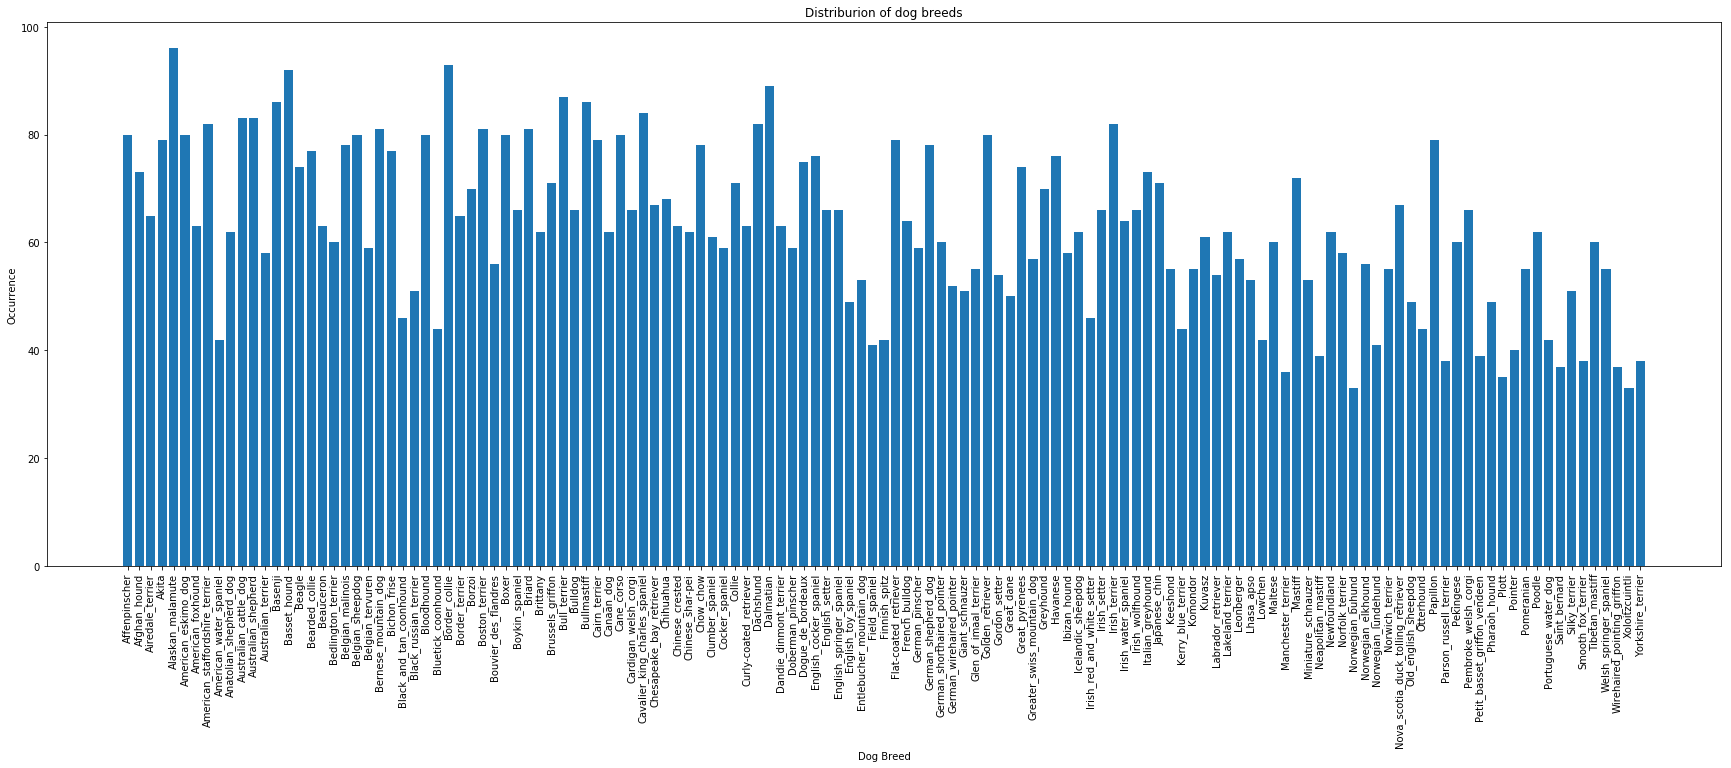

In [35]:
dog_distr=get_breed_distribution(dog_files)

OK, looks the dog images are roughly uniformly distributed amongst the 133 dog breeds. It is okey to use test accuracy as evaluation metrics. 

Then, I am going to do a few plotings using matplot.pyplt to see the size of these images and how should we resize them.

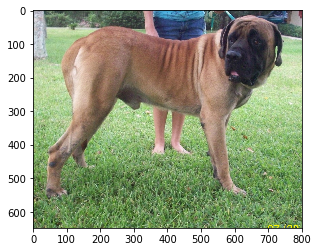

In [36]:
plt.imshow(plt.imread(dog_files[0]));

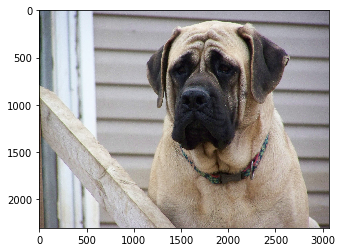

In [37]:
plt.imshow(plt.imread(dog_files[3]));

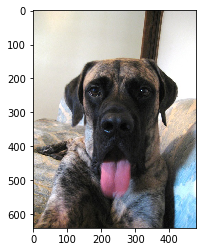

In [38]:
plt.imshow(plt.imread(dog_files[9]));

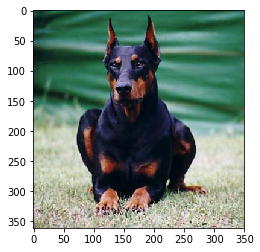

In [39]:
plt.imshow(plt.imread(dog_files[99]));

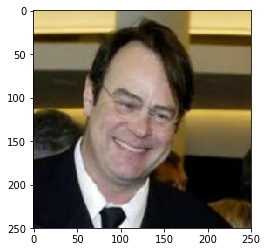

In [40]:
plt.imshow(plt.imread(human_files[0]));

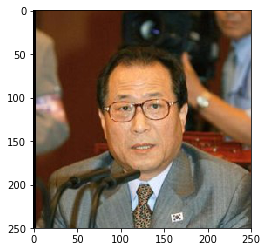

In [41]:
plt.imshow(plt.imread(human_files[5]));

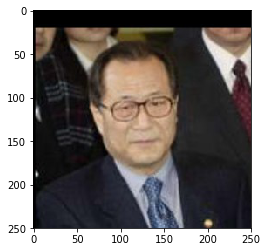

In [42]:
plt.imshow(plt.imread(human_files[8]));

Further, I am going to extract some descriptive statistics on the image size using the function below.

In [43]:
def get_image_size_distribution(file_dir):
    '''Return the shape of images as a pandas DataFrame. 
    -------------------------------------
    Args:
    file_dirs: the file directory of the image dataset'''
    
    img_shape_df=pd.DataFrame() # create a empty DataFrame
    # loop through all image directories and get the shape of images
    img_shape_list=[plt.imread(img_dir).shape for img_dir in file_dir] 
    img_shape_df['Img_shape']=img_shape_list
    
    return img_shape_df

In [44]:
dog_img_df= get_image_size_distribution(dog_files) # extract the imag size of all the dog imag files
dog_img_df.columns=['dog_img_shape'] # change the column name
dog_img_df.head() # display the head of the DataFrame to have a glimpse

,dog_img_shape
0,"(648, 800, 3)"
1,"(307, 300, 3)"
2,"(433, 250, 3)"
3,"(2304, 3072, 3)"
4,"(395, 400, 3)"


In [45]:
dog_img_df.describe() # show the descriptive stats on the shape of dog image shape

,dog_img_shape
count,8351
unique,4217
top,"(480, 640, 3)"
freq,476


In [46]:
# repeat the same procedure on human face images
human_img_df= get_image_size_distribution(human_files)
human_img_df.columns=['Human_img_shape']
human_img_df.head()

,Human_img_shape
0,"(250, 250, 3)"
1,"(250, 250, 3)"
2,"(250, 250, 3)"
3,"(250, 250, 3)"
4,"(250, 250, 3)"


In [47]:
dog_img_df.describe() # show the descriptive stats on the shape of dog image shape

,dog_img_shape
count,8351
unique,4217
top,"(480, 640, 3)"
freq,476


From the sample data exploration, we can conclude that the dog images vary in size, but the human face images tend to have identicial size. As a result, I am going to do some resize or cropping in later data pre-processing stages.

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


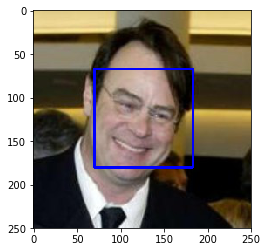

In [48]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [49]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    '''returns "True" if face is detected in image stored at img_path'
    -------------------
    Args: 
    img_path: the directory of the image to  be detected'''
    img = cv2.imread(img_path) # read in the pic from the img path 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the pic from color to grey
    faces = face_cascade.detectMultiScale(gray) # from the grey pic detect human faces 
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [50]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# return the boolean result of detecting human images and dog images
human_detect_results=[face_detector(img_path) for img_path in human_files_short] 
dog_detect_results=[face_detector(img_path) for img_path in dog_files_short]

#calculate the percentage accuracy
human_detect_pct=sum(human_detect_results)/len(human_files_short)
dog_detect_pct=sum(dog_detect_results)/len(dog_files_short)

#print out the percentage result 
print('The accuracy of correctly detecting human images is: ',human_detect_pct)
print('The probability of detecting dog images as human faces is: ',dog_detect_pct)

The accuracy of correctly detecting human images is:  0.98
The probability of detecting dog images as human faces is:  0.17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [51]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [52]:
import torch
import torchvision.models as models

In [53]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [54]:
# import libraries
from PIL import Image
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [55]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    
    ##set how to transform the data into standard normalized input
    transform=transforms.Compose(
                                [transforms.Resize(size=(224)),# resize the image to 224*224 pixels, the minmal requirement 
                                 transforms.CenterCrop(224),# Crop the image to 224*224 pixels around the center
                                 transforms.ToTensor(),#convert image to pytorch tensor datatype
                                 #Normalize the image by setting its mean and standard deviation to the specified values
                                 transforms.Normalize((0.5,0.5,0.5),
                                                      (0.5,0.5,0.5))
                                                    ])
    
    ## load the image and pre-process it 
    img_file=Image.open(img_path) # read in the image 
    img_tranformed=transform(img_file).cuda() # transform the image file to required format,
    # and cast the input to cuda 
    img_batch=torch.unsqueeze(img_tranformed,0) # prepare an input batch to pass to the model 
    
    ## perform inference using pretrained VGG16 model 
    VGG16.eval() # set the model to evaluation mode
    output_vec=VGG16(img_batch) # pass in the input batch and perform the inference,get the output as a vector
    
    ## Return the *index* of the predicted class for that image
    _, index = torch.max(output_vec, 1) 
    
    return int(index) # convert predicted class index into an integer 

In [56]:
VGG16_predict(dog_files[0])

243

Citation: the code above is written after referring to https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [57]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    '''This function takes a image directory as input and return a boolean value depending on whether the image 
    contains a dog or not.
    
    Args:
        img_path: path to an image
        
    Returns:
        Boolean value: True if the image contains a dog, False if not. 
    '''
    ## TODO: Complete the function.
    numerical_rep=VGG16_predict(img_path) # perform inference with VGG16 model
    
    return  (numerical_rep>=151) & (numerical_rep <= 268) # return true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [58]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_detect_results=[dog_detector(img_path) for img_path in human_files_short] 
dog_detect_results=[dog_detector(img_path) for img_path in dog_files_short]

#calculate the percentage accuracy
human_detect_pct=sum(human_detect_results)/len(human_files_short)
dog_detect_pct=sum(dog_detect_results)/len(dog_files_short)

#print out the percentage result 
print('The probability of classify human images as dogs is: ',human_detect_pct)
print('The accuracy of detecting dog images is: ',dog_detect_pct)

The probability of classify human images as dogs is:  0.0
The accuracy of detecting dog images is:  1.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [59]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)/Build the Benchmark Model

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset/Preprocess Data

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [60]:
# check the size of the dataset
print('train example number:',len(glob('/data/dog_images/train/*/*')))
print('validation example number:',len(glob('/data/dog_images/valid/*/*')))
print('test example number:',len(glob('/data/dog_images/test/*/*')))

train example number: 6680
validation example number: 835
test example number: 836


In [61]:
# import necessary libray and specify data directory and batch size 
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

#specify train, validate, and test data directory
DogImageDir='/data/dog_images'
TrainDir=os.path.join(DogImageDir,'train')
ValDir=os.path.join(DogImageDir,'valid')
TestDir=os.path.join(DogImageDir,'test')

Batch_size=16 

In [62]:
# build training data transformer, dataset and loader

#build training data transformer
train_transformer=transforms.Compose([transforms.Resize(224),# resize the image to 224*224 pixels
                              transforms.CenterCrop(224),# Crop the image to 224*224 pixels around the center
                              transforms.RandomHorizontalFlip(), # randomly rotate the image 
                              transforms.RandomRotation(30), # randomly rotate the image by 30 degrees
                              transforms.ToTensor(),#convert image to pytorch tensor datatype
                              transforms.Normalize((0.5,0.5,0.5),#Normalize the image 
                                                      (0.5,0.5,0.5))
                                                    ])


# build train dataset
train_dataset = datasets.ImageFolder(root=TrainDir,transform=train_transformer)

#build train loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                         batch_size = Batch_size,
                                         shuffle = True)   

In [63]:
# build validation data transformer, dataset and loader
valid_transformer=transforms.Compose([transforms.Resize(224),# resize the image to 224*224 pixels
                              transforms.CenterCrop(224),# Crop the image to 224*224 pixels around the center
                              transforms.ToTensor(),#convert image to pytorch tensor datatype
                              transforms.Normalize((0.5,0.5,0.5),#Normalize the image 
                                                      (0.5,0.5,0.5))
                                                    ])

val_dataset=datasets.ImageFolder(root=ValDir,transform=valid_transformer)

val_loader = torch.utils.data.DataLoader(dataset = val_dataset, 
                                         batch_size = Batch_size)      

In [64]:
# build test data transformer, dataset and loader
test_transformer=transforms.Compose([transforms.Resize(224),# resize the image to 224*224 pixels
                              transforms.CenterCrop(224),# Crop the image to 224*224 pixels around the center
                              transforms.ToTensor(),#convert image to pytorch tensor datatype
                              transforms.Normalize((0.5,0.5,0.5),#Normalize the image 
                                                      (0.5,0.5,0.5))
                                                    ])
test_dataset=datasets.ImageFolder(root=TestDir,transform=test_transformer)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                         batch_size = Batch_size)

In [65]:
#assemble all loders into a larger data loder
loaders_scratch={'train':train_loader,'valid':val_loader,'test':test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
Because the dog images vary in size, my code resize all images in a standard size of 224-224 pixels and randomly filp each image and rotate each image by 30 degrees. As a result, the input tensor would be of size 224-224-3. We resize images into relatively large size because, unlike binary classification, multi-class classification is of greater complexity, and so we would like to retain more features. I augmented the dataset by random filps and rotations mainly to reduce overfitting. Because image in the validation and test set or sent by end-users would be dog pictures with different angles and directions, trying to randomly rotate and flip training set images would make our model less likely to overfit the training set, and thus reduce model variance.




### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [66]:
#import libaraies
import torch.nn as nn
import torch.nn.functional as F

In [67]:
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    ## Define layers of a CNN
    def __init__(self):
        super(Net, self).__init__()
        # define the first convolutional layer for 224*224*3 tensor
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(16)
        # define the second convolutional layer for 112*112*16 tensor: size is deduced by half by maxpooling
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(32)
        # define the second convolutional layer for 56*56*32
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(64)
        # define max pooling layer
        self.maxpool = nn.MaxPool2d(2, 2) 
        # define fist linear layer:after three maxpool layer transform: size now is 28 *28 *64
        self.fc1 = nn.Linear(28 * 28 * 64, 512) # transform size from 28 *28 *64 to 512
        # define fist linear layer: transform size from 512 to 133
        self.fc2 = nn.Linear(512, 133)
        # define dropout layer with p of 0.5
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional, max pooling, and batch normalizion layers
        x = self.maxpool(F.relu(self.conv1(x)))
        x = self.batchnorm1(x)
        
        x = self.maxpool(F.relu(self.conv2(x)))
        x = self.batchnorm2(x)
        
        x = self.maxpool(F.relu(self.conv3(x)))
        x = self.batchnorm3(x)
        
        # flatten input from 3D tensor to 1D tensor 
        x = x.view(-1, 28 * 28 * 64)
        # perform dropout layer to reduce overfitting
        x = self.dropout(x)
        # first linear layer, with relu activation function
        x = F.relu(self.fc1(x))
        # perform dropout layer to reduce overfitting
        x = self.dropout(x)
        # second linear layer, without relu activation function
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [68]:
# print the achitecture of the cnn
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.5)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 


I used a a CNN with three convolutional layers and two fully connected linear layers. From the first to the last convolutional layers, I increase the number of filters of size 3 by 3 from 16 to 64, mainly to reduce the nodes we need to manage in linear layers. ReLu functions and maxpooling of size 2 by 2 were used after each convolutional layer for dimension reduction, which is the default choice in building a CNN. After maxpooling, batchnorm was recruited to reduce overfitting and improve validation performance. Likewise, before the transformation in each linear layer, I used dropout fuction with probability of 0.5 for regularization. 

I started the architecture by referring to the sample_cnn.png in the directory. After trying training for multiple times, I found the architecture contains the problem of overfitting because training loss and validation loss diverged, and then I tried and added multiple regularizer including batch normalization, increasing dropout probabilities and augmenting the training data. Finally increased the model performance in validation and test set.

Also, I understood the functionality of each layer from this paper: https://ip.cadence.com/uploads/901/cnn_wp-pdf

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [69]:
import torch.optim as optim

In [70]:
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss() #we define loss function as Cross Entropy Loss as we are doing multi-class classfication

### TODO: select optimizer
optimizer_scratch = optim.SGD(params=model_scratch.parameters(),lr=0.01) # we use stochastic gradient descend as optimizer



### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [71]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # this variable has to be set true to process image of large size 

In [72]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """This function trains the model and returns trained model
    
    Args:
        n_epochs: number of iterations 
        loaders: pre-processed dataloader 
        model: the initializted model
        optimizer: the optimizer used for parameter updating
        criterion: optimization objective 
        use_cuda: boolean value, whether to move to GPU
        save_path: the directory to save the trained model
        
    Returns:
        a trained model
    """
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad() # clear all previous gradient
            outputs=model(data) # perform forward proprogation
            loss=criterion(outputs,target) # compute loss 
            loss.backward() # perform backprop
            optimizer.step() # parameter update
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            outputs = model(data)     # perform forward propagation
            loss = criterion(outputs, target) # calculate the loss
            ## update the average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss<valid_loss_min:
            print('Validation loss descreased from {} to {}. save the model'.format(valid_loss_min,valid_loss))
            torch.save(model.state_dict(), save_path) # save the model
            valid_loss_min=valid_loss # update decreased validation loss
            
    # return trained model
    return model

In [74]:
# train the model: we first try 30 epochs
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 4.701382 	Validation Loss: 4.425551
Validation loss descreased from inf to 4.425550937652588. save the model
Epoch: 2 	Training Loss: 4.363297 	Validation Loss: 4.199326
Validation loss descreased from 4.425550937652588 to 4.199326038360596. save the model
Epoch: 3 	Training Loss: 4.096434 	Validation Loss: 4.024827
Validation loss descreased from 4.199326038360596 to 4.024826526641846. save the model
Epoch: 4 	Training Loss: 3.919698 	Validation Loss: 4.055848
Epoch: 5 	Training Loss: 3.757354 	Validation Loss: 3.923725
Validation loss descreased from 4.024826526641846 to 3.9237253665924072. save the model
Epoch: 6 	Training Loss: 3.606451 	Validation Loss: 3.935442
Epoch: 7 	Training Loss: 3.466059 	Validation Loss: 3.762258
Validation loss descreased from 3.9237253665924072 to 3.7622578144073486. save the model
Epoch: 8 	Training Loss: 3.366698 	Validation Loss: 3.997214
Epoch: 9 	Training Loss: 3.249460 	Validation Loss: 3.759152
Validation loss descreased 

In [75]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [76]:
def test(loaders, model, criterion, use_cuda):
    """This function tests the trained model and print out the test performance.
    
    Args:
        loaders: pre-processed dataloader 
        model: the trained model
        criterion: loss function
        use_cuda: boolean value, whether to move to GPU
        
    """
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [77]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.732784


Test Accuracy: 19% (162/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)/Build the Solution Model

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [78]:
## TODO: Specify data loaders
# use the same data loaders
loaders_transfer=loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [79]:
# import libraries and down load which model to transfer from 
import torchvision.models as models
import torch.nn as nn
model_transfer = models.resnet152(pretrained=True)
model_transfer # pring out the model architecture

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:04<00:00, 55753445.75it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [80]:
## TODO: Specify model architecture 
# do the fine-tuning 
for p in model_transfer.parameters():
    p.requires_grad = False # freeze parameters of the model

    
    num_in=model_transfer.fc.in_features
    # replace the last linear layer: fit our class size as the output nodes of the last linear layer
    model_transfer.fc=nn.Linear(in_features=num_in,out_features=133) 
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

The final CNN architecture is basically obtained by iterating different pretrained models.I tried AlexNet with 30 epoches, only yielding a minimal validation loss of 1.34. Also I first set learning rate at 0.01, which turns out too large because the training loss soon diverged from the validation loss. Then, I tried densenet121 with the same 30 epoches but at a learning rate of 0.001, the test result was much better of 1.12 minimal validation CELoss. I think this significant increase in accuracy can be contributed to the more complex architecture of the densenet. Finally, I tried resnet152 and obtained a 0.95 CELoss.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [81]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss() # we still use Cross EntropyLoss as loss function
optimizer_transfer = optim.SGD(params=filter(lambda p: p.requires_grad, model_transfer.parameters()),
                               #only the parameters that requires gradient are passed to the optimizer, 
                               #which is the final 133 parameters
                              lr=0.001) 

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [82]:
model_transfer # print the model achitecture of our transferred model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [83]:
# train the model
model_transfer =train(30, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')




Epoch: 1 	Training Loss: 4.783747 	Validation Loss: 4.583898
Validation loss descreased from inf to 4.583898067474365. save the model
Epoch: 2 	Training Loss: 4.464309 	Validation Loss: 4.249383
Validation loss descreased from 4.583898067474365 to 4.249383449554443. save the model
Epoch: 3 	Training Loss: 4.180496 	Validation Loss: 3.954886
Validation loss descreased from 4.249383449554443 to 3.9548864364624023. save the model
Epoch: 4 	Training Loss: 3.912890 	Validation Loss: 3.663058
Validation loss descreased from 3.9548864364624023 to 3.663057804107666. save the model
Epoch: 5 	Training Loss: 3.662304 	Validation Loss: 3.401880
Validation loss descreased from 3.663057804107666 to 3.4018802642822266. save the model
Epoch: 6 	Training Loss: 3.427730 	Validation Loss: 3.163719
Validation loss descreased from 3.4018802642822266 to 3.1637189388275146. save the model
Epoch: 7 	Training Loss: 3.218211 	Validation Loss: 2.903577
Validation loss descreased from 3.1637189388275146 to 2.9035

In [84]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [85]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.048763


Test Accuracy: 81% (684/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [86]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

In [87]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.


def predict_breed_transfer(img_path):
    """This function returned the dog breed inferred by the model. 
    
    Args:
      img_path: the directory of the image
        
    Returns:
        (str) the name of the predicted dog breed
    """
    # load the image and return the predicted breed
    
    #open the image
    img_file=Image.open(img_path);
    
    # define the transformer of the image
    transformer=transforms.Compose(
                                [transforms.Resize(size=(224)),# resize the image to 224*224 pixels
                                 transforms.CenterCrop(224),# Crop the image to 224*224 pixels around the center
                                 transforms.ToTensor(),#convert image to pytorch tensor datatype
                                 #Normalize the image by setting its mean and standard deviation to 
                                 #the specified values
                                 transforms.Normalize((0.5,0.5,0.5),
                                                      (0.5,0.5,0.5))
                                                    ])
    ## load the image and pre-process it 
    img_tranformed=transformer(img_file).cuda() # transform the image file to required format,
    # and cast the input to cuda 
    img_batch=torch.unsqueeze(img_tranformed,0) # prepare an input batch to pass to the model 
    
    model_transfer.eval()# set the model to evaluation mode
    output=model_transfer(img_batch) # perform forward propa
    
    ## Return the *index* of the predicted class for that image
    _, index = torch.max(output, 1) 
    
    return class_names[int(index)]

In [88]:
predict_breed_transfer(dog_files[0]) # sanity check for the function above

'Bullmastiff'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [89]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    """This function takes a image directory,prints the image and  an estimated dog breed if a dog
    is detected in the image, or a dog breed the human look like most if a human face is detected. 

    
    Args:
        img_path: the directory of the image
        
    Returns:
        a trained model
    """
    ## handle cases for a human face, dog, and neither
    plt.imshow(plt.imread(img_path)); # display the image
    plt.show()
    if face_detector(img_path): # detect whether the image has a human face
        print('Hello, human! ')
        print('You look like a...')
        print(predict_breed_transfer(img_path)) # find the dog the face most resembles
        
    elif dog_detector(img_path): # detect whether the image is a dog
        print('Hello, dog! ')
        print('I think you are a...')
        print(predict_breed_transfer(img_path)) # find the dog breed
    else:
        print('Error, the image is neither a human nor a dog!')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
Well, the output is within my expectations. The final algorithm does well when distinguishing human, dog, and other objects. It also performs pretty well when classifying dog breeds with unique characteristics. However, just like human beings, it underperforms when the same breed has several variations, such as the case of Labrador retrievers. It also tends to mess breeds with subtle outlooking differences, such as a Mastiff and a Bull Mastiff. This issue is mainly caused by limited training examples. 

In terms of further improvement, I think increasing the size of training examples definitively helps, as the model can learn how to distinguish closely related breeds and tolerate intra-breed variations. Also, I think having a large training image size may help to train the model to address the same issue. Finally, because I observed a consistent doward trend of the validation error when training the final model, I also expect to have a better performing model if I can train the model with additional epochs.


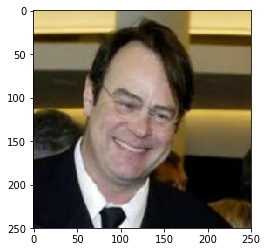

Hello, human! 
You look like a...
Chinese crested


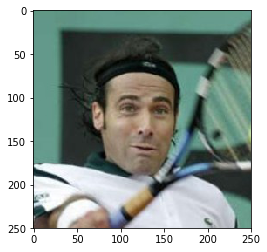

Hello, human! 
You look like a...
Xoloitzcuintli


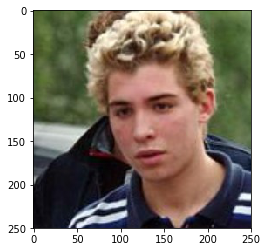

Hello, human! 
You look like a...
Cane corso


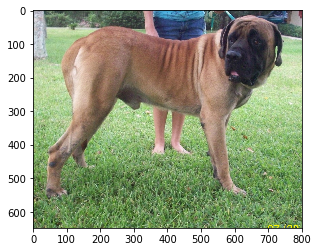

Hello, dog! 
I think you are a...
Bullmastiff


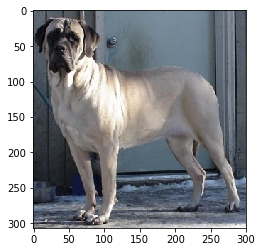

Hello, dog! 
I think you are a...
Mastiff


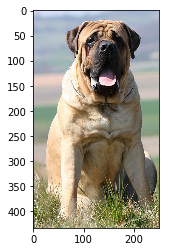

Hello, dog! 
I think you are a...
Bullmastiff


In [90]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

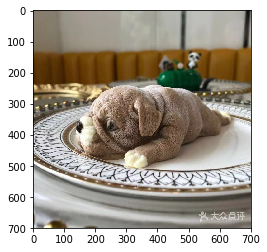

Error, the image is neither a human nor a dog!


In [91]:
run_app('/home/workspace/dog_project/images/DogCake.jpeg')

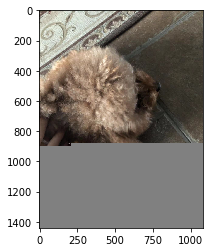

Hello, dog! 
I think you are a...
Irish water spaniel


In [92]:
run_app('/home/workspace/dog_project/images/DogHead.jpeg')

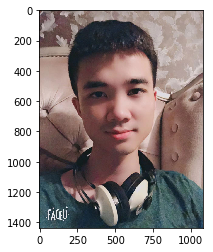

Hello, human! 
You look like a...
Chinese crested


In [93]:
run_app('/home/workspace/dog_project/images/Human.jpeg')

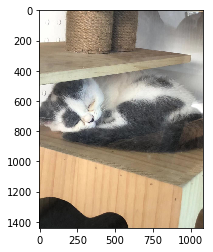

Error, the image is neither a human nor a dog!


In [94]:
run_app('/home/workspace/dog_project/images/SpottedCat.jpeg')

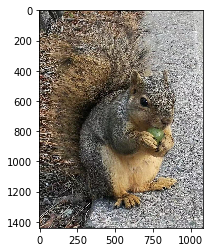

Error, the image is neither a human nor a dog!


In [95]:
run_app('/home/workspace/dog_project/images/Squirrel.jpeg')

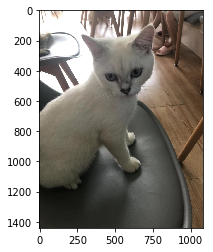

Error, the image is neither a human nor a dog!


In [96]:
run_app('/home/workspace/dog_project/images/Whitecat.jpeg')

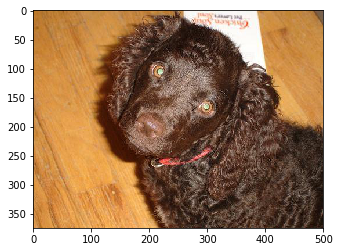

Hello, dog! 
I think you are a...
Curly-coated retriever


In [97]:
run_app('/home/workspace/dog_project/images/American_water_spaniel_00648.jpg')

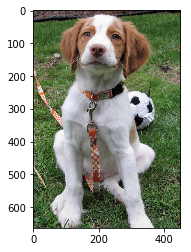

Hello, dog! 
I think you are a...
Brittany


In [98]:
run_app('/home/workspace/dog_project/images/Brittany_02625.jpg')

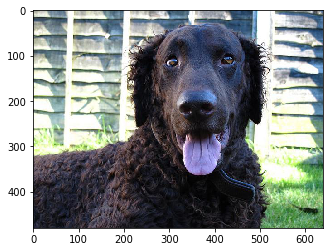

Hello, dog! 
I think you are a...
Curly-coated retriever


In [99]:
run_app('/home/workspace/dog_project/images/Curly-coated_retriever_03896.jpg')

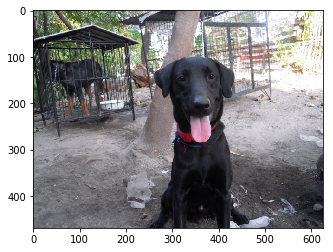

Hello, dog! 
I think you are a...
Labrador retriever


In [100]:
run_app('/home/workspace/dog_project/images/Labrador_retriever_06449.jpg')

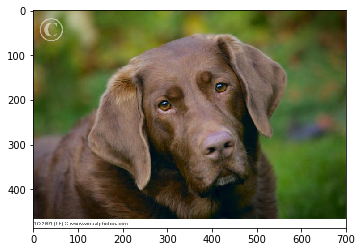

Hello, dog! 
I think you are a...
Chesapeake bay retriever


In [101]:
run_app('/home/workspace/dog_project/images/Labrador_retriever_06455.jpg')

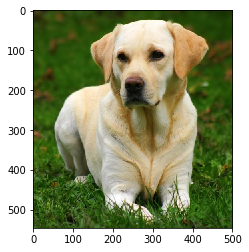

Hello, dog! 
I think you are a...
Labrador retriever


In [102]:
run_app('/home/workspace/dog_project/images/Labrador_retriever_06457.jpg')

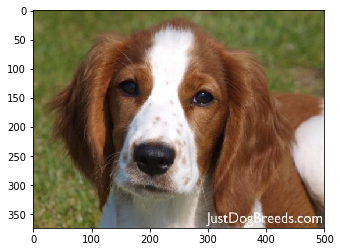

Hello, dog! 
I think you are a...
Irish red and white setter


In [103]:
run_app('/home/workspace/dog_project/images/Welsh_springer_spaniel_08203.jpg')